# K-Nearest Neighbour


K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). A new record is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

Suppose you want to find out the class of the blue star (BS) in the image below. BS can either be RC or GS. The “K” is KNN algorithm is the nearest neighbor we wish to take the vote from. Let’s say K = 3. Hence, we will now make a circle with BS as the center just as big as to enclose only three datapoints on the plane. The three closest points to BS is all RC. Hence, with a good confidence level, we can say that the BS should belong to the class RC. Here, the choice became very obvious as all three votes from the closest neighbor went to RC. The choice of the parameter K is very crucial in this algorithm.

<img src="img1.png">

The distance functions used for Numeric fields are given below:
<img src="img2.png">

### Libraries useful in K-NN are listed below

### Get The Data. Load data "spambase_data.csv"

In [1]:
import pandas as pd
df = pd.read_csv('Classified Data')
df.head() # used to display top 5 rows

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Train and Test Split

In [2]:
X = df[df.columns[1:-1]] # Selecting the independent variables
Y=df[df.columns[len(df.columns)-1]] # selecting only the target lableled column

#### Obtain X_train, X_test, Y_train, Y_test by splitting the dataset into 70-30 ratio with a random state value 30.

Note: random_state is used to control the shuffling in the split of the dataset.

This method is called the Hold Out Method.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)

### Import the k-NN Classifier library

In [4]:
from sklearn.neighbors import KNeighborsClassifier

### Train 3-NN by using euclidean distance as distance measure

In [5]:
knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean')

### Prediction and Evaluation

In [6]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [7]:
predictions = knn.predict(X_test)

In [8]:
print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       144
           1       0.96      0.96      0.96       156

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

Confusion Matrix
[[138   6]
 [  7 149]]

 Accuracy
0.9566666666666667


###  k (5)- fold method for training and testing split and check the difference in performance of 3-NN 

In [9]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [0.905 0.93  0.905 0.935 0.96 ]
mean score:  0.9269999999999999


#### Q1: Normalize the dataset and apply 3-NN using both euclidean and manhattan distance

In [10]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
ndf = pd.DataFrame(x_scaled)

Xn = df[df.columns[1:-1]] # Selecting the independent variables
Yn = df[df.columns[len(df.columns)-1]] # selecting only the target lableled column

Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(Xn, Yn, test_size=0.30, random_state = 30)

knn_3e=KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_3e.fit(Xn_train, Yn_train)
predictions = knn_3e.predict(Xn_test)
print("Accuracy")
print(accuracy_score(Yn_test,predictions))

print()

knn_3m=KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_3m.fit(Xn_train, Yn_train)
predictions = knn_3m.predict(Xn_test)
print("Accuracy")
print(accuracy_score(Yn_test,predictions))

Accuracy
0.9266666666666666

Accuracy
0.9433333333333334


#### Q2: Write your observation regarding change in the perfromance of KNN

Accuracy is more for manhattan than euclidean distance. Also, accuracy is less than unnormalised set. This may be because of how the data was already optimised with the best predicting feature having had more weight.

#### Q3: Find the accuracy of 1-NN model (using euclidean distance)

In [11]:
#### Code here ####
knn_1e=KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_1e.fit(X_train, Y_train)
predictions = knn_1e.predict(X_test)
print("Accuracy")
print(accuracy_score(Y_test,predictions))

Accuracy
0.9133333333333333


#### Q4: Find the accuracy of the models by taking k from 1 to 20. (Using euclidean distance and k(5)-fold method for train-test split)

In [12]:
#### Code here ####
accuracy_arr= []
for x in range(1, 21):
    knn_q4 = KNeighborsClassifier(n_neighbors=x, metric = 'euclidean')
    scores = cross_val_score(knn_q4, X, Y, cv=5, scoring='accuracy')
    accuracy_arr.append(scores.mean())
    
print(accuracy_arr)

[0.908, 0.909, 0.9269999999999999, 0.93, 0.931, 0.9359999999999999, 0.9349999999999999, 0.9390000000000001, 0.9359999999999999, 0.9390000000000001, 0.9380000000000001, 0.9380000000000001, 0.9360000000000002, 0.9360000000000002, 0.9339999999999999, 0.937, 0.9340000000000002, 0.9380000000000001, 0.9339999999999999, 0.9349999999999999]


#### Q5: Plot the graph between k and the accuracy score and find the best value of k

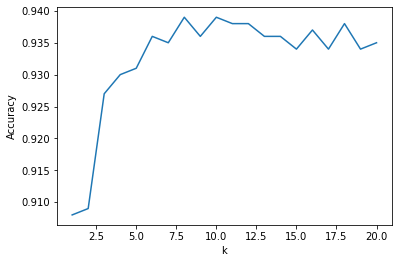

8

In [13]:
#### Write your answer here ####
import matplotlib.pyplot as plt 

plt.plot(range(1,21), accuracy_arr)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()
accuracy_arr.index(max(accuracy_arr))+1

#### Q6: Find the accuracy of the models by taking k from 1 to 20. (Using manhattan distance  k(5)-fold method for train-test split)

In [14]:
#### Code here ####
accuracy_arr= []
for x in range(1, 21):
    knn_q6 = KNeighborsClassifier(n_neighbors=x, metric = 'manhattan')
    scores = cross_val_score(knn_q6, X, Y, cv=5, scoring='accuracy')
    accuracy_arr.append(scores.mean())
    
print(accuracy_arr)

[0.897, 0.8959999999999999, 0.9259999999999999, 0.932, 0.9219999999999999, 0.9269999999999999, 0.933, 0.9339999999999999, 0.9349999999999999, 0.933, 0.932, 0.93, 0.932, 0.937, 0.937, 0.9389999999999998, 0.9410000000000001, 0.943, 0.938, 0.942]


#### Q7:  Plot the graph between k and the accuracy score and find the best value of k

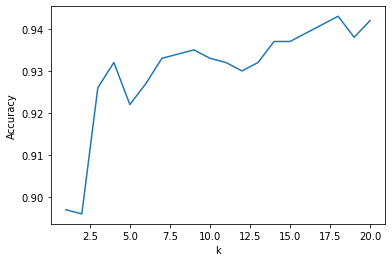

18

In [15]:
#### Write your answer here ####
plt.plot(range(1,21), accuracy_arr)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()
accuracy_arr.index(max(accuracy_arr))+1

#### Q8: Write your observation

For Euclidean distance, accuracy comes earlier at 8. It comes at 18 for manhattan. Accuracy of maximum manhattan is much more than maximum euclidean due to high dimensionality of data. The manhattan curve doesn't shoow signs of maximising yet, unlike the Euclidean curve

#### Q9: Implement the weighted k-NN model. Use k(5)-fold method for train-test split

In [16]:
accuracy_arr= []
for x in range(1, 21):
    knn_q4 = KNeighborsClassifier(n_neighbors=x, metric = 'euclidean', weights='distance')
    scores = cross_val_score(knn_q4, X, Y, cv=5, scoring='accuracy')
    accuracy_arr.append(scores.mean())
    
print(accuracy_arr)

[0.908, 0.908, 0.9269999999999999, 0.923, 0.931, 0.93, 0.9349999999999999, 0.937, 0.937, 0.9390000000000001, 0.9390000000000001, 0.9390000000000001, 0.9380000000000001, 0.9349999999999999, 0.9359999999999999, 0.9339999999999999, 0.9360000000000002, 0.9360000000000002, 0.9339999999999999, 0.933]


#### Q10: What is the best k value in this model. Take max k =20

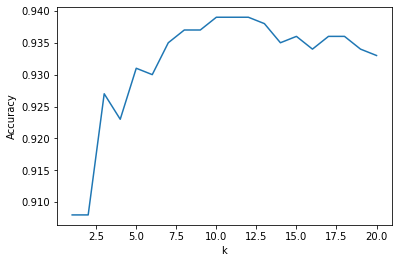

10

In [17]:
#### Write your answer here ####
plt.plot(range(1,21), accuracy_arr)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()
accuracy_arr.index(max(accuracy_arr))+1